# Homework 1
You are a business analyst working for a major US toy retailer:

* A manager in the marketing department wants to find out the **most frequently used words in positive reviews** (five stars) and **negative reviews (one star)** in order to determine who the toys are being bought for (sons, significant others, grandchildren, siblings, self, etc.). He would like your opinion on which customer segments' (son, daughter, granddaugher, grandson, niece, nephew, sibling, significant other, etc.) marketing messaging tends to outperform other segments.

* One of your product managers suspects that **toys with batteries tend to be significantly lower rated than toys that do not require batteries**. She would like to see some data points confirming or rejecting her hypothesis.

* Clearly, the word count approach, as you'll discover, has many limitations. What are some issues your group has identified when performing text analysis using this approach?

Perform the same word count analysis using the reviews received from Amazon to answer your marketing manager's question. They are stored in two files, (`poor_amazon_toy_reviews`) and (`good-amazon-toy-reviews.txt`).

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

def count_words(lines, delimiter=" "):
    words = Counter()
    
    for line in lines:
        for word in line.split(delimiter):
            words[word] += 1 # increment counter for word
        
    return words

In [24]:
# Bring in poor and good reviews
poor = open("poor_amazon_toy_reviews.txt", "r", encoding = 'utf-8')
good = open("good_amazon_toy_reviews.txt", "r", encoding = 'utf-8')

In [25]:
# readlines for each review
poor_lines = poor.readlines()
good_lines = good.readlines()

In [26]:
# Get word counts for each
poor_counts = count_words(poor_lines)
good_counts = count_words(good_lines)

In [27]:
# Get most frequently used words for poor
sorted_poor = sorted((value, key) for (key,value) in poor_counts.items())
sorted_poor[::-1]

[(18992, 'the'),
 (10909, 'and'),
 (9629, 'I'),
 (9589, 'to'),
 (9203, 'a'),
 (8774, 'it'),
 (7343, ''),
 (6692, 'of'),
 (5459, 'not'),
 (5444, 'is'),
 (5338, 'was'),
 (4777, 'for'),
 (4344, 'this'),
 (4129, 'in'),
 (3130, 'with'),
 (2957, 'that'),
 (2948, 'on'),
 (2878, 'my'),
 (2862, 'The'),
 (2774, 'but'),
 (2400, 'are'),
 (2214, 'have'),
 (2085, 'as'),
 (1973, 'you'),
 (1954, 'one'),
 (1825, 'very'),
 (1820, 'so'),
 (1776, 'they'),
 (1751, 'be'),
 (1657, 'It'),
 (1621, 'at'),
 (1603, 'had'),
 (1563, 'would'),
 (1522, 'were'),
 (1456, 'like'),
 (1335, 'all'),
 (1293, 'out'),
 (1268, 'just'),
 (1260, 'get'),
 (1211, 'them'),
 (1180, 'even'),
 (1173, 'from'),
 (1165, 'when'),
 (1161, 'only'),
 (1150, 'This'),
 (1129, 'up'),
 (1126, 'we'),
 (1104, 'or'),
 (1000, 'will'),
 (977, 'got'),
 (970, 'no'),
 (934, 'after'),
 (903, 'what'),
 (877, 'these'),
 (870, 'if'),
 (862, 'product'),
 (852, 'your'),
 (852, "didn't"),
 (850, 'because'),
 (846, 'did'),
 (832, 'buy'),
 (822, 'Not'),
 (816, '

In [28]:
# Get most frequently used words for good
sorted_good = sorted((value, key) for (key,value) in good_counts.items())
sorted_good[::-1]

[(96606, 'the'),
 (86557, 'and'),
 (66611, 'a'),
 (63339, 'to'),
 (48358, 'I'),
 (48350, 'for'),
 (44934, ''),
 (42321, 'is'),
 (41543, 'it'),
 (36593, 'of'),
 (32540, 'this'),
 (28829, 'with'),
 (28718, 'my'),
 (25566, 'in'),
 (20096, 'was'),
 (18650, 'are'),
 (18143, 'that'),
 (17790, 'on'),
 (16964, 'as'),
 (14811, 'so'),
 (14696, 'but'),
 (14446, 'The'),
 (14375, 'have'),
 (13725, 'you'),
 (13598, 'My'),
 (12544, 'loves'),
 (12482, 'great'),
 (12325, 'love'),
 (11813, 'very'),
 (10221, 'they'),
 (10176, 'It'),
 (9547, 'be'),
 (9070, 'one'),
 (9018, 'little'),
 (8888, 'not'),
 (8848, 'all'),
 (8784, 'old'),
 (8705, 'can'),
 (8404, 'like'),
 (8381, 'at'),
 (8219, 'Great'),
 (8149, 'just'),
 (8141, 'This'),
 (8097, 'them'),
 (7761, 'has'),
 (7715, '/><br'),
 (7602, 'year'),
 (7437, 'her'),
 (7423, 'these'),
 (7246, 'will'),
 (7196, 'loved'),
 (7138, 'or'),
 (6823, 'up'),
 (6513, 'he'),
 (6511, 'really'),
 (6507, 'fun'),
 (6251, 'had'),
 (6235, 'when'),
 (6178, 'kids'),
 (6175, 'we'),


In [29]:
# Create desired customer segment list
segment_list = ['son', 'daughter', 'child', 'children', 'granddaughter', 'grandson', 'grandchildren', 'niece', 'nephew', 
                'sibling', 'brother', 'sister', 'significant other', 'boyfriend', 'girlfriend', 'husband', 'wife']

In [30]:
# Create dictionaries with all lower case values
poor_lower = {k.lower():v for k,v in poor_counts.items()}
good_lower = {k.lower():v for k,v in good_counts.items()}

In [31]:
# Find counts for each item in segment list
# Need to find all mentions for each item (Ex. son, Son, son's, Son's, etc.)
# Start with poor list
poor_segment = {}
for i in segment_list:
    poor_segment[i] = sum([value for key, value in poor_counts.items() if i in key.lower()])

In [32]:
poor_segment

{'boyfriend': 7,
 'brother': 45,
 'child': 575,
 'children': 225,
 'daughter': 567,
 'girlfriend': 1,
 'grandchildren': 21,
 'granddaughter': 95,
 'grandson': 195,
 'husband': 63,
 'nephew': 51,
 'niece': 48,
 'sibling': 2,
 'significant other': 0,
 'sister': 26,
 'son': 1205,
 'wife': 25}

In [33]:
# Now do the same for the good list
good_segment = {}
for i in segment_list:
    good_segment[i] = sum([value for key, value in good_counts.items() if i in key.lower()])

In [34]:
good_segment

{'boyfriend': 194,
 'brother': 553,
 'child': 4879,
 'children': 2346,
 'daughter': 10875,
 'girlfriend': 151,
 'grandchildren': 465,
 'granddaughter': 3059,
 'grandson': 4391,
 'husband': 807,
 'nephew': 1497,
 'niece': 1263,
 'sibling': 97,
 'significant other': 0,
 'sister': 564,
 'son': 14312,
 'wife': 402}

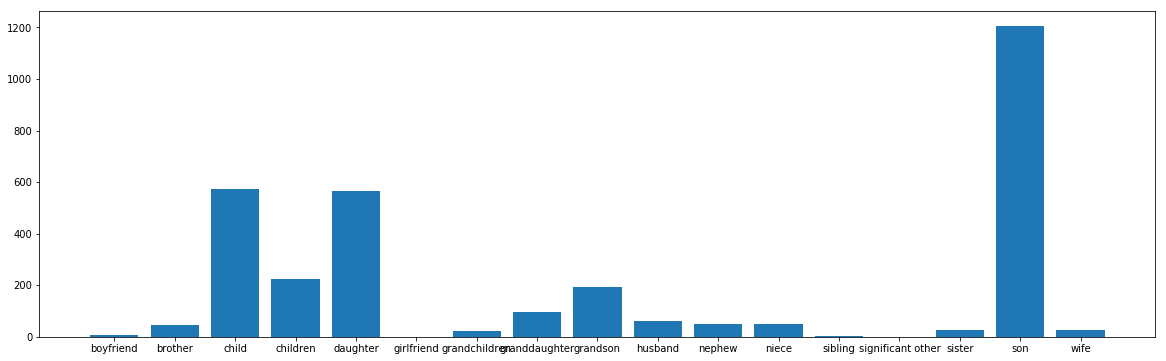

In [35]:
# Plot the poor reviews
x = poor_segment.keys()
y = poor_segment.values()
plt.figure(figsize = (20,6))
plt.bar(x, y)
plt.show()

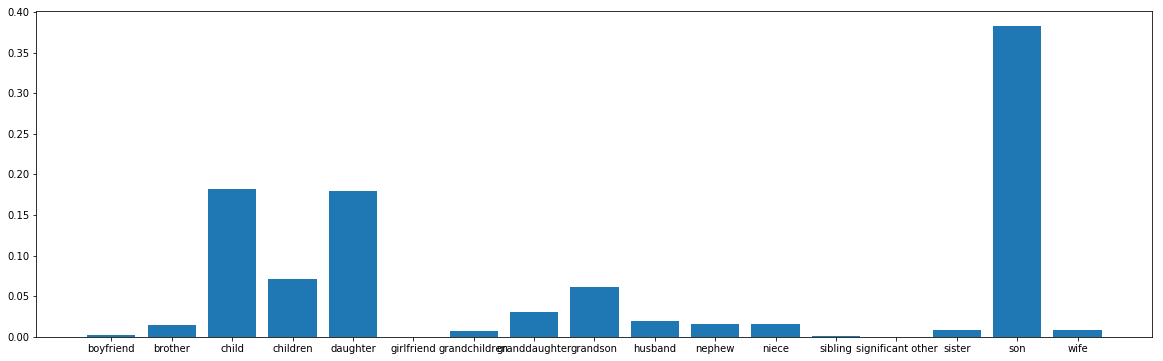

In [36]:
# Plot reviews in % terms
x = poor_segment.keys()
y = [x / sum(poor_segment.values()) for x in poor_segment.values()]
plt.figure(figsize = (20,6))
plt.bar(x, y)
plt.show()

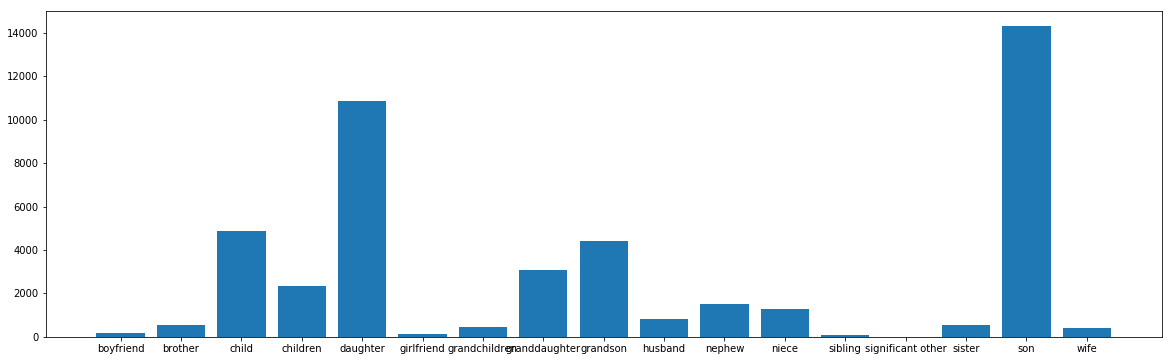

In [37]:
# Plot the good reviews
x = good_segment.keys()
y = good_segment.values()
plt.figure(figsize = (20,6))
plt.bar(x, y)
plt.show()

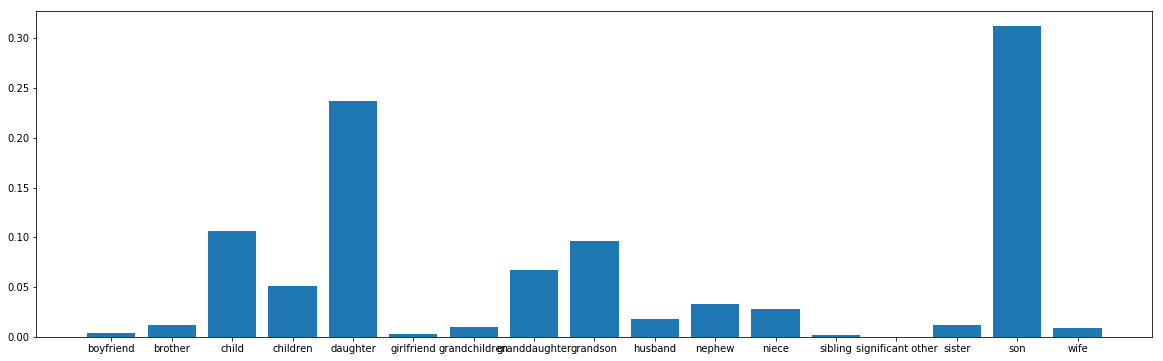

In [38]:
# Plot the good reviews in % terms
x = good_segment.keys()
y = [x / sum(good_segment.values()) for x in good_segment.values()]
plt.figure(figsize = (20,6))
plt.bar(x, y)
plt.show()

The Marketing message appears to be strongest for **children (sons and daughters)**. As you can see, the percentage of son, daughter, child, children references surpass over 70% of all reviews. If we make an assumption that the proportion of references in these reviews reflects the true customer segments (more consumer behavior psychographic research will need to be conducted to validate this hypothesis), **then approximately three quarters of the target user's market is children.** Thus, the message appears to be most targeting parents buying toys for their kids.

In [39]:
# Find mentions of battery in poor and good reviews
# Start with poor list
battery_list = ['battery', 'batteries']
poor_battery = {}
for i in battery_list:
    poor_battery[i] = sum([value for key, value in poor_lower.items() if i in key.lower()])

In [40]:
poor_battery

{'batteries': 120, 'battery': 77}

In [41]:
# Now for the good list
good_battery = {}
for i in battery_list:
    good_battery[i] = sum([value for key, value in good_lower.items() if i in key.lower()])

In [42]:
good_battery

{'batteries': 278, 'battery': 316}

Now I want to calculate the percentage of poor and good reviews that include the word 'battery' or 'batteries'.  I'm going to assume that all items with '\n' in each dictionary signal the end of a review. 

In [43]:
# % of poor reviews with battery mentioned
sum(poor_battery.values()) / sum([value for key, value in poor_lower.items() if '\n' in key.lower()])

0.01934027096014137

In [44]:
# % of good reviews with battery mentioned
sum(good_battery.values()) / sum([value for key, value in good_lower.items() if '\n' in key.lower()])

0.010880715123094959

In [45]:
# Perform Hypothesis Testing to Compare The Population Proportions
import numpy as np
p_1 = sum(poor_battery.values()) / sum([value for key, value in poor_lower.items() if '\n' in key.lower()])
p_2 = sum(good_battery.values()) / sum([value for key, value in good_lower.items() if '\n' in key.lower()])
p = (sum(poor_battery.values()) + sum(good_battery.values())) / (sum([value for key, value in poor_lower.items() if '\n' in key.lower()]) + sum([value for key, value in good_lower.items() if '\n' in key.lower()]))
n_1 = sum([value for key, value in poor_lower.items() if '\n' in key.lower()])
n_2 = sum([value for key, value in good_lower.items() if '\n' in key.lower()])

z = (p_1 - p_2) / np.sqrt(p*(1-p)*((1/n_1)+(1/n_2)))
z

7.136636078720457

The % of poor reviews with battery mentions is nearly double that of the good reviews.  Also, the proportion of poor reviews vs good reviews is statistically signficiant with a **z-score of 7.13**, which is much higher than the z-score of 1.96 at the **95%** confidence level.

There are many limitations with just using word count to analyze reviews.  Even though we have the reviews separated into poor and good, we do not understand the **context of the reviews** that mention our key words.  For example, just because 'son' is mentioned does not necessarily mean that the toy was purchased for their son. Another limitation with this analysis is that 'son' appears as a portion of other words, such as grandson.  So 'son' was being counted at times when it should not have been counted, whether for 'grandson' or other words that include 'son' in it.  The same issue applies with batteries.  Reviews may mention batteries in their reviews, but it may not have a bearing on their overall review of the toy.  Lastly, this analysis did not account for **misspelled words or slang**.  People may refer to their son, daughter, etc with a variety of different terms, but they would not have been captured in this analysis.